In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
class player():
    def __init__(self, name, precision, speed, stat_msg, table):
        self.name = name
        self.precision = precision
        self.speed = speed
        self.stat_msg = stat_msg
        self.tries = 0
        self.num_balls = 0
        self.wait = 0
        self.ndrinks = 0
        self.drink_hist = []
        self.stat_msg = stat_msg
        self.table = table
    def say_name(self):
        print(f"Ich heiße {self.name}!")
    def print_info(self):
        print(f"Ich heiße {self.name}, habe die Präzision {self.precision:.2f} "
              + f"und die Geschwindigkeit {self.speed:.2f}.")
    def throw(self):
        if self.stat_msg: print(f"{self.name} throwing... ", end="")
        self.tries += 1
        success = (np.random.random() < self.precision)
        if self.stat_msg:
            if success:
                print("success!")
            else:
                print("no success!")
        return success
    def drink(self):
        if self.stat_msg: print(f"{self.name} drinking...")
        self.wait = 2
        self.ndrinks += 1
        self.table.ndrinks -= 1
    def getting_ball(self):
        self.num_balls += 1
        self.wait = 1 + int(1/self.speed)
    def find_right_of_other(self):
        for pl in self.table.players:
            if pl.left_neighbour.num_balls > 0:
                if not pl.left_neighbour == self:
                    # pl is the right neighbour of the other active player!
                    return pl
    def time_step(self):
        if self.num_balls == 1:
            if not self.wait:
                success = self.throw()
                if success:
                    if self.left_neighbour.num_balls > 0:
                        # left neighbour has a ball, catch him/her!
                        self.left_neighbour.getting_ball()
                        self.num_balls -= 1
                        if self.stat_msg: print(f"{self.name} caught {self.left_neighbour.name}!")
                    else:
                        # now, differentiate between 1st and nth try:
                        if self.tries == 1:
                            # move to the right neighbour of the other active player.
                            # For this, do a quick search for the player whos left neighbour
                            # has the ball:
                            pl = self.find_right_of_other()
                            pl.getting_ball()
                            self.num_balls -= 1
                            if self.stat_msg: print(f"First hit for {self.name}!!!")
                            if self.stat_msg: print(f"moving from {self.name} to {pl.name}!")
                        else:
                            # just move to the left neighbour
                            self.left_neighbour.getting_ball()
                            self.num_balls -= 1
                            if self.stat_msg: print(f"moving from {self.name} to {self.left_neighbour.name}!")
                else:
                    self.wait = 1 + int(1/self.speed)
        elif self.num_balls == 2:
            # drink, keep one ball, pass on the other
            self.drink()
            self.left_neighbour.getting_ball()
            self.num_balls -= 1
        if self.wait: self.wait -= 1
        self.drink_hist.append(self.ndrinks)

In [89]:
class table():
    def __init__(self, num_players, min_prec=0.1, max_prec=1,
                 min_speed=0.2, max_speed=1, ndrinks = 20,
                 stat_msg=True):
        self.players = []
        self.ndrinks = ndrinks
        # initialize the players
        for ii in range(num_players):
            self.players.append(player(f"p{ii}", 
                    precision=np.random.random() * (max_prec-min_prec) + min_prec ,
                    speed=np.random.random() * (max_speed-min_speed) + min_speed,
                    stat_msg=stat_msg, table=self))
        # arrange them around the table by defining the left neighbour of each player
        for ii, pl in enumerate(self.players[:-1]):
            pl.left_neighbour = self.players[ii+1]
        # and for the last one, to close the loop:
        self.players[-1].left_neighbour = self.players[0]
        # initialize the starting position of the two balls:
        index_1 = 0
        index_2 = int(len(self.players)/2)
        self.players[index_1].num_balls = 1
        self.players[index_2].num_balls = 1
        self.stat_msg = stat_msg
    def print_info(self):
        for pl in self.players:
            pl.print_info()
    def time_step(self):
        for pl in self.players:
            pl.time_step()
    def run_game(self, nsteps=20):
        for ii in range(nsteps):
            if self.stat_msg: print(f"time step {ii}")
            if self.ndrinks > 0:
                self.time_step()
            else:
                break
    def plot_drink_hist(self):
        fig, ax = plt.subplots()
        for pl in self.players:
            ax.plot(pl.drink_hist, label=f"{pl.name}: {pl.ndrinks} drink(s)")
        ax.legend()
        ax.set_xlabel("time step (a.u.)")
        ax.set_ylabel("n drinks (-)")
        plt.tight_layout()

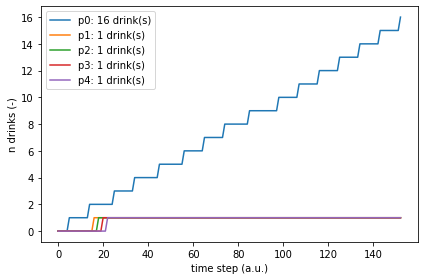

In [90]:
tbl = table(5, stat_msg=False,
            min_prec=0.9, max_prec=0.9,
            min_speed=0.9, max_speed=0.9)
tbl.players[0].precision = 0.1
tbl.players[0].speed = 0.1
tbl.run_game(1000)
tbl.plot_drink_hist()